In [1]:
import pandas as pd

In [32]:
df = pd.read_csv('data/small_corpus.csv')
df['reviews']= df['reviews'].astype(str)

In [62]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

In [54]:
def classify(item):
    output = classifier(item)[0]
    label = output['label']
    score = output['score']
    return ','.join([label,str(score)])

In [63]:
df['label_score'] = df['reviews'].apply(lambda x : classify(x[:512]))

In [64]:
def prediction_to_class(label_score,threshold):
    val = label_score.split(',')
    label = val[0]
    score = float(val[1])
    if label == "NEGATIVE" and score > threshold:
            return 0
    elif label == "POSITIVE" and score > threshold:
        return 2
    else:
        return 1

In [65]:
df['predicted'] = df['label_score'].apply(lambda x : prediction_to_class(x,0.75))

# Results

In [66]:
def score_to_Target(value):
    if value >= 5:
        return 2
    if value <= 4 and value >= 2:
        return 1
    else:
        return 0

In [67]:
df['rating_classes'] = df['ratings'].apply(lambda x:score_to_Target(x))

In [83]:
df['predicted'] = df['label_score'].apply(lambda x : prediction_to_class(x,0.99))

In [84]:
rating_classes = list(df["rating_classes"])
predicated_values  = list(df["predicted"])
target_names = ["negative", "neutral", "positive"]
from sklearn.metrics import classification_report
print(classification_report(rating_classes, predicated_values, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.64      0.82      0.72      1500
     neutral       0.49      0.30      0.37      1500
    positive       0.71      0.78      0.74      1500

    accuracy                           0.63      4500
   macro avg       0.61      0.63      0.61      4500
weighted avg       0.61      0.63      0.61      4500



In [85]:
import altair as alt
import numpy as np
from sklearn.metrics import confusion_matrix
x, y = np.meshgrid(range(0, 3), range(0, 3))
cm=confusion_matrix(rating_classes, predicated_values, labels=[0, 1, 2])

In [86]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

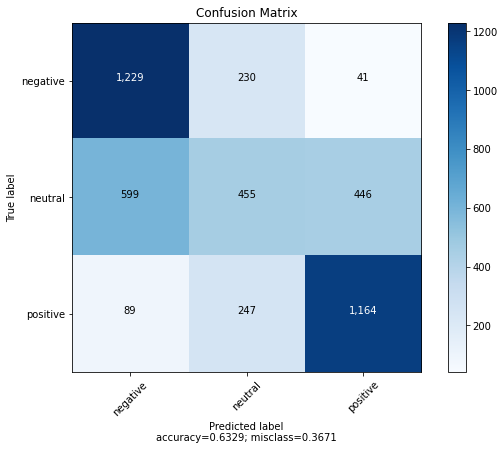

In [87]:
plot_confusion_matrix(cm           = cm,
                      normalize    = False,
                      target_names = ["negative", "neutral", "positive"],
                      title        = "Confusion Matrix")